In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [28]:
df=pd.read_csv('monthly-milk-production-pounds-p.csv', index_col= 'Month')

In [33]:
df.columns=['produce']

In [34]:
df.dropna(inplace=True)
df.index = pd.to_datetime(df.index)

In [35]:
df.head()

,produce
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [36]:
df['6-month-SMA']=df.produce.rolling(window=6).mean()
df['12-month-SMA']=df.produce.rolling(window=12).mean()

In [37]:
df.head(15)

,produce,6-month-SMA,12-month-SMA
Month,,,
1962-01-01,589.0,NaN,NaN
1962-02-01,561.0,NaN,NaN
1962-03-01,640.0,NaN,NaN
1962-04-01,656.0,NaN,NaN
1962-05-01,727.0,NaN,NaN
1962-06-01,697.0,645.000000,NaN
1962-07-01,640.0,653.500000,NaN
1962-08-01,599.0,659.833333,NaN
1962-09-01,568.0,647.833333,NaN


<AxesSubplot:xlabel='Month'>

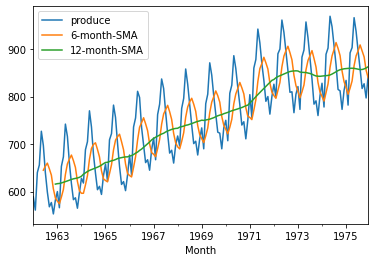

In [38]:
df.plot()

<AxesSubplot:xlabel='Month'>

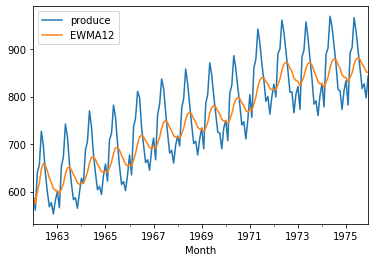

In [39]:
df['EWMA12'] = df.produce.ewm(span=12).mean()

df[['produce','EWMA12']].plot()

In [40]:
# trend, cycle

# Hodrick-Prescott filter
cycle, trend = sm.tsa.filters.hpfilter( df.produce)

In [41]:
df["trend"] = trend
df["cycle"] = cycle

<AxesSubplot:xlabel='Month'>

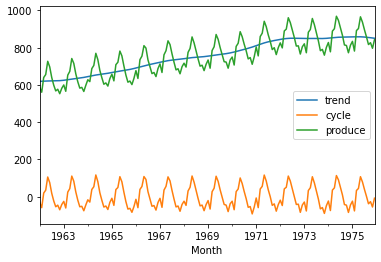

In [43]:
df[['trend','cycle','produce']].plot()

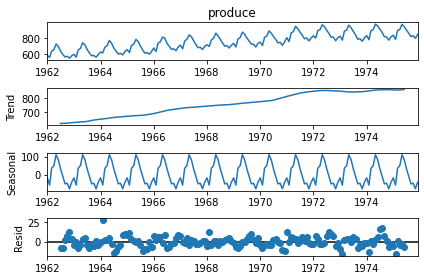

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.produce, model='additive')
ref=result.plot()

In [45]:
# testing if data is stationary or not 

In [46]:
from statsmodels.tsa.stattools import adfuller

In [47]:
_,pval,_,_,_,_ = adfuller(df.produce)

In [48]:
pval   # not able to discard null hypotheses

0.6274267086030316

In [49]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [50]:
# taking first diffrence

df['first_diff'] = df.produce - df.produce.shift(1)

In [51]:
ts=df['first_diff'].dropna() 

In [52]:
adf_check(ts)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530704
p-value : 0.030068004001785647
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

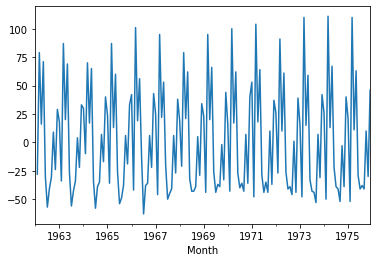

In [53]:
df["first_diff"].plot()

In [54]:
df["second_diff"]= df["first_diff"]- df["first_diff"].shift(1)

In [55]:
ts=df['second_diff'].dropna() 

In [56]:
adf_check(ts)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.327873645603301
p-value : 1.1126989332084581e-26
#Lags Used : 11
Number of Observations Used : 154
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

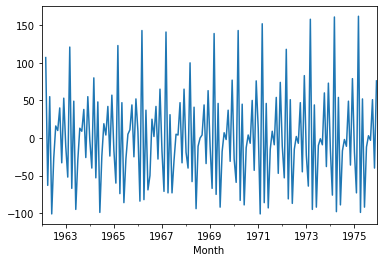

In [57]:
df["second_diff"].plot()

In [58]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [59]:
# ploting partial correlation funtion

In [60]:
df.head()

,produce,6-month-SMA,12-month-SMA,EWMA12,trend,cycle,first_diff,second_diff
Month,,,,,,,,
1962-01-01,589.0,NaN,NaN,589.000000,619.319755,-30.319755,NaN,NaN
1962-02-01,561.0,NaN,NaN,573.833333,619.901591,-58.901591,-28.0,NaN
1962-03-01,640.0,NaN,NaN,599.658199,620.464477,19.535523,79.0,107.0
1962-04-01,656.0,NaN,NaN,617.443103,620.952650,35.047350,16.0,-63.0
1962-05-01,727.0,NaN,NaN,647.209321,621.322556,105.677444,71.0,55.0


In [61]:
airline.first_diff.plot?

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

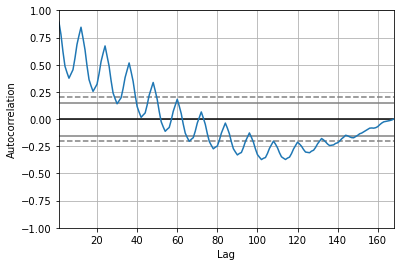

In [61]:
pd.plotting.autocorrelation_plot(df.produce)

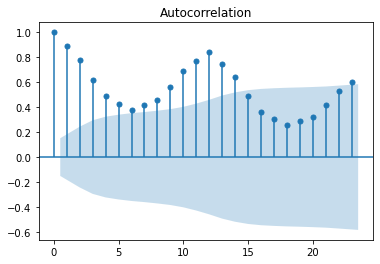

In [62]:
fig=plot_acf(df.produce)

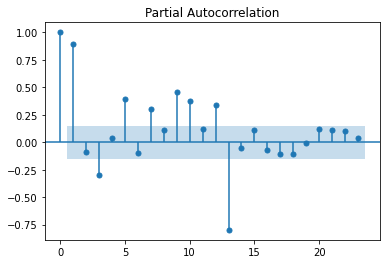

In [63]:
fig=plot_pacf(df.produce)

In [67]:
# after 2nd lag autocorrelation goes off 

In [64]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [73]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(df.produce,order=(2,2,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\shris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                              produce   No. Observations:                  168
Model:             SARIMAX(2, 2, 0)x(1, 1, [1], 12)   Log Likelihood                -546.589
Date:                              Thu, 12 Aug 2021   AIC                           1103.178
Time:                                      13:02:58   BIC                           1118.363
Sample:                                  01-01-1962   HQIC                          1109.346
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8798      0.069    -12.822      0.000      -1.014      -0.745
ar.L2         -0.46

<AxesSubplot:xlabel='Month'>

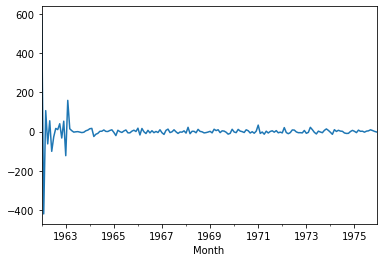

In [74]:
results.resid.plot()

<AxesSubplot:xlabel='Month'>

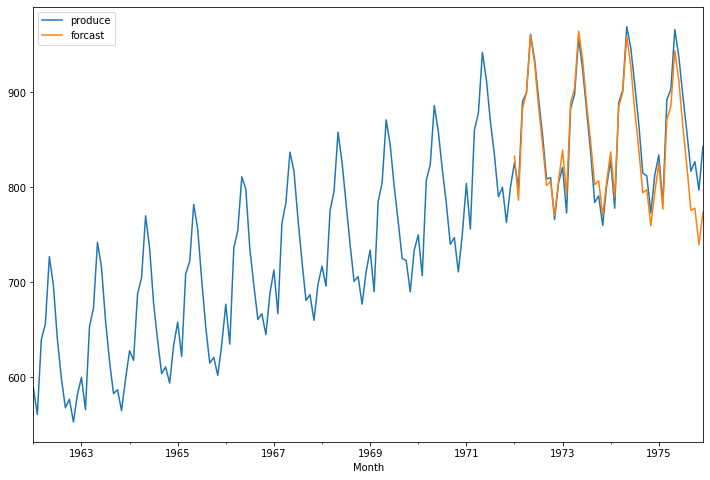

In [75]:
df['forcast'] = results.predict(start = 120, end= 168, dynamic= True)  
df[['produce','forcast']].plot(figsize=(12,8))

In [77]:
from sklearn.metrics import r2_score

r2_score(df.produce.iloc[120:168],df['forcast'].iloc[120:168])

0.8698123165316726